In [1]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
# image=cv2.imread('data/images/cars1.png')

In [2]:
images = []
for i in tqdm(range(433)):
    image=cv2.imread(f'data/images/cars{i}.png')
    images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


100%|██████████| 433/433 [00:09<00:00, 46.34it/s]


In [3]:
images[0]

array([[[ 25,  75, 100],
        [ 73, 130, 159],
        [ 52, 127, 158],
        ...,
        [ 38,  39,  41],
        [ 33,  34,  36],
        [ 37,  38,  40]],

       [[ 31,  79, 101],
        [ 65, 121, 146],
        [ 46, 119, 151],
        ...,
        [ 31,  33,  32],
        [ 41,  43,  42],
        [ 26,  28,  27]],

       [[ 44,  87, 104],
        [ 65, 117, 139],
        [ 43, 116, 146],
        ...,
        [ 32,  37,  33],
        [ 35,  40,  36],
        [ 25,  30,  26]],

       ...,

       [[ 72,  49,  41],
        [ 73,  50,  42],
        [ 74,  51,  43],
        ...,
        [104,  67,  48],
        [103,  68,  48],
        [104,  67,  48]],

       [[ 75,  52,  44],
        [ 76,  53,  45],
        [ 75,  52,  44],
        ...,
        [104,  66,  47],
        [104,  67,  48],
        [105,  67,  48]],

       [[ 75,  52,  44],
        [ 75,  52,  44],
        [ 75,  52,  44],
        ...,
        [102,  64,  45],
        [103,  65,  46],
        [104,  66,  47]]

In [4]:
def normalize(image):
    return image/255

In [116]:
def show_image(image):
    fig, ax = plt.subplots(figsize=(10, 8))
    #1 =white, 0 = black
    ax.imshow(image, cmap='gray')
    # ax.imshow(image)
    plt.show()

In [23]:
def hsv(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


In [132]:
image=cv2.imread('data/images/contoh.jpeg')
image=hsv(image)

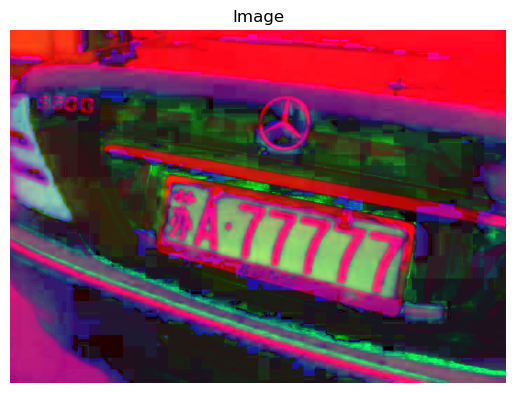

In [133]:
show_image(image)

In [10]:
image.shape

(125, 176, 3)

In [128]:
image = image.astype(float)

# Double the values in the first channel (Red channel)
image[:, :, 0] *= 2

# Normalize the values in the other channels (Green and Blue channels)
image[:, :, 1:] /= 255.0

In [129]:
show_image(image)

error: OpenCV(4.10.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [79]:
h,s,v=cv2.split(image)

In [90]:
gray_h = cv2.cvtColor(h, cv2.COLOR_GRAY2BGR)
gray_s = cv2.cvtColor(s, cv2.COLOR_GRAY2BGR)
gray_v = cv2.cvtColor(v, cv2.COLOR_GRAY2BGR)

In [ ]:
gray_v

array([[[249, 249, 249],
        [249, 249, 249],
        [250, 250, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[251, 251, 251],
        [250, 250, 250],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[252, 252, 252],
        [251, 251, 251],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       ...,

       [[180, 180, 180],
        [176, 176, 176],
        [180, 180, 180],
        ...,
        [ 44,  44,  44],
        [ 42,  42,  42],
        [ 41,  41,  41]],

       [[183, 183, 183],
        [167, 167, 167],
        [169, 169, 169],
        ...,
        [110, 110, 110],
        [106, 106, 106],
        [105, 105, 105]],

       [[167, 167, 167],
        [162, 162, 162],
        [175, 175, 175],
        ...,
        [118, 118, 118],
        [112, 112, 112],
        [112, 112, 112]]

In [75]:
h = np.where(h >= 180, 1, 0)
s = np.where(s > 0.5*255, 1, 0)
v = np.where(v > 0.5*255, 1, 0)

In [ ]:
h=cv2.bitwise_not(h)
s=cv2.bitwise_not(s)
v=cv2.bitwise_not(v)


In [100]:
combine=cv2.bitwise_and(s,cv2.bitwise_and(h,v))

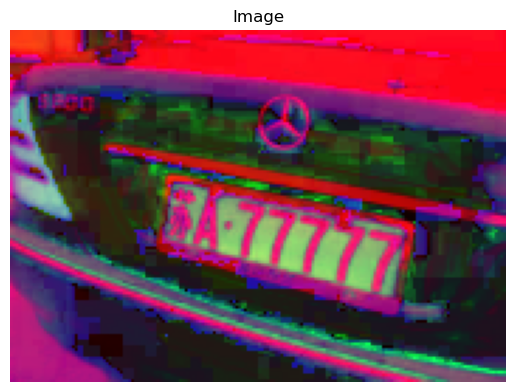

In [112]:
show_image(image)

In [119]:

def show_image(image, title='Image'):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

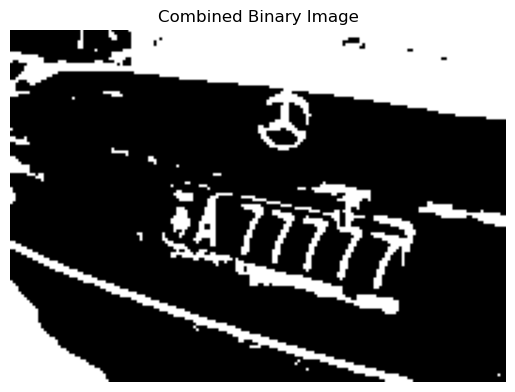

In [122]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(image, title='Image'):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Read the image

# Convert the image from BGR to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into its respective channels
h_channel, s_channel, v_channel = cv2.split(hsv_image)

# Apply noise removal to each channel using GaussianBlur
h_channel_denoised = cv2.GaussianBlur(h_channel, (3, 3), 0)
s_channel_denoised = cv2.GaussianBlur(s_channel, (3, 3), 0)
v_channel_denoised = cv2.GaussianBlur(v_channel, (3, 3), 0)

# Convert each channel to a binary image using thresholding
_, h_binary = cv2.threshold(h_channel_denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, s_binary = cv2.threshold(s_channel_denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, v_binary = cv2.threshold(v_channel_denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Perform an "AND" operation on the binary images
combined_binary = cv2.bitwise_and(h_binary, s_binary)
combined_binary = cv2.bitwise_and(combined_binary, v_binary)

# Display the resulting image
show_image(combined_binary, title='Combined Binary Image')

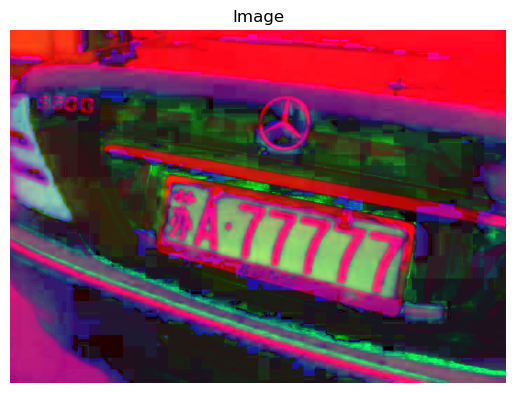

In [134]:
show_image(image)